## Модульное домашнее задание 2. Гипотезы
![](img/task.png)
![](img/task_variant.png)

In [1]:
from random import uniform
from math import sqrt,ceil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors
from time import time
from scipy.stats import t as t_f
from scipy.stats import norm as norm_f
from scipy.stats import chi2 as chi2_f
from scipy.stats import geom as geom_f
from IPython.display import display
from collections import Counter

### Задание 1
* **Шапиро-Уилк**
```
В ряде опытов, особенно в медицинских исследованиях, численность выборки мала. Специально для проверки 
нормальности распределения малых, численностью от трех до пятидесяти элементов, выборок Шапиро и Уилк 
разработали критерий W
```
Ммм, сейчас бы на 3х элементах проверять нормальность выборки...
Как вычисляется можно посчитать [тут](https://nsu.ru/mmf/tvims/arkashov/calc/Stat/Shapiro/Shapiro.html), но там счлишком много констант, которые нужно смотреть.

* **Лиллиефорс**
The test proceeds as follows:

    1. First estimate the population mean and population variance based on the data.
    2. Then find the maximum discrepancy between the empirical distribution function and the cumulative distribution function (CDF) of the normal distribution with the estimated mean and estimated variance. Just as in the Kolmogorov–Smirnov test, this will be the test statistic.
    3. Finally, assess whether the maximum discrepancy is large enough to be statistically significant, thus requiring rejection of the null hypothesis. This is where this test becomes more complicated than the Kolmogorov–Smirnov test. Since the hypothesised CDF has been moved closer to the data by estimation based on those data, the maximum discrepancy has been made smaller than it would have been if the null hypothesis had singled out just one normal distribution. Thus the "null distribution" of the test statistic, i.e. its probability distribution assuming the null hypothesis is true, is stochastically smaller than the Kolmogorov–Smirnov distribution. This is the Lilliefors distribution. To date, tables for this distribution have been computed only by Monte Carlo methods.
    
То есть, первые два действия - идентичны Колмогорову-Смирнову (ну или почти), просто посчитаем среднее и отклонение выборки и найдем максимум между теоретической и эмпирической ф.р. - получили критерий и далее просто по табличке.


Спойлер: случайно попалась (статья)[https://www.researchgate.net/publication/267205556_Power_Comparisons_of_Shapiro-Wilk_Kolmogorov-Smirnov_Lilliefors_and_Anderson-Darling_Tests], где сравнивались эти две и другие статистики. Results show that Shapiro-Wilk test is the most powerful normality test, followed by Anderson-Darling test, Lilliefors test and Kolmogorov-Smirnov test. However, the power of all four tests is still low for small sample size. 

Ну а мы воспользуемся реализованными функциями.

```
scipy.stats.shapiro
Комментарий на сайте: For N > 5000 the W test statistic is accurate but the p-value may not be.
```

```
statsmodels.stats.diagnostic.lilliefors
```

И сначала будем предполагать верным $H_0$ и проверим совпадения уровня значимости с ностоящим, чтобы проверить, что с моделями все ок, и их можно применять, а затем уже будем предполагать верным $H_1$ и сравним мощность.

In [2]:
def make_sample(a = 0, b = 1, size = 100, H_0 = True):
    if H_0:
        return np.random.normal(a, b, size=size)
    else:
        return np.random.uniform(a, b, size = size)

Проверим адекватность критерия, пусть верно $H_0$, посмотрим на распределение pval при разных размерах выборки. Каждый раз генерирую набор нормально распределенных с.в. с параметрами:
```
mu = uniform(-100, 100)
sigma = uniform(0, 100)
```

In [3]:
def return_y_x(a = 0, b = 1):
    x = [i/100 for i in range(0,1*100)]
    return x, x

def check_pval(criteria, size):
    pvals = []
    length = 10000
    for _ in range(length):
        mu = uniform(-100, 100)
        sigma = uniform(0, 100)
        if criteria == 'shapiro':
            pvals.append(shapiro(make_sample(mu, sigma, size, True))[1])
        if criteria == 'lilliefors':
             pvals.append(lilliefors(make_sample(mu, sigma, size, True))[1])
    tresholds = [0.1, 0.05, 0.01]
    counter = [0,0,0]
    for p in pvals:
        for i in range(3):
            if p < tresholds[i]:
                counter[i]+=1
                
    x, y = return_y_x()
    plt.plot(x, y, label = 'y = x')
    plt.title(f'Критерий {criteria}. Распределение pval для N(a, sigma) при размере выборки {size}')
    kwargs = {'cumulative': True}
    sns.distplot(pvals, hist_kws=kwargs, kde_kws=kwargs, label = 'real distribution')
    plt.plot
    plt.legend()
    plt.show()
    for i in range(3):
        print(f'Значений pval < {tresholds[i]}: {counter[i]/length}')


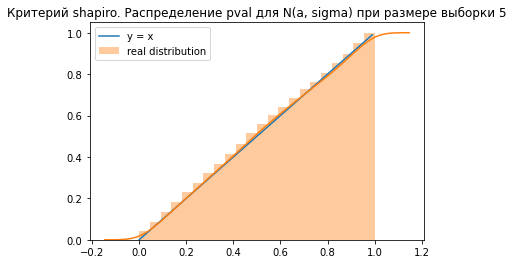

Значений pval < 0.1: 0.0958
Значений pval < 0.05: 0.0463
Значений pval < 0.01: 0.0105


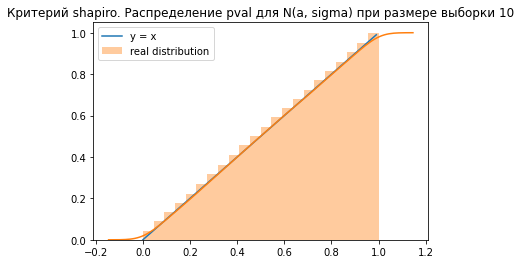

Значений pval < 0.1: 0.0988
Значений pval < 0.05: 0.0483
Значений pval < 0.01: 0.0104


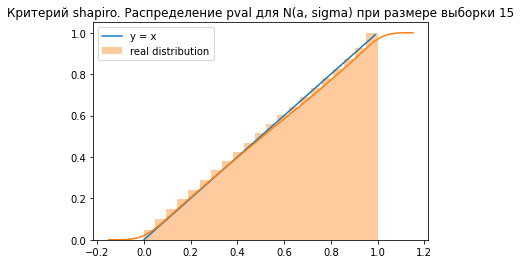

Значений pval < 0.1: 0.1044
Значений pval < 0.05: 0.0503
Значений pval < 0.01: 0.0096


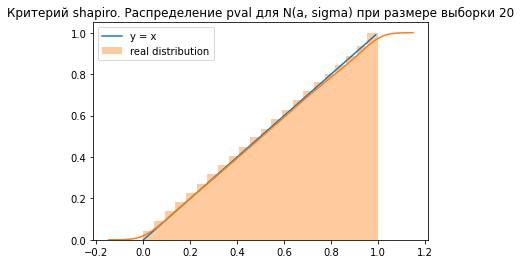

Значений pval < 0.1: 0.1011
Значений pval < 0.05: 0.0491
Значений pval < 0.01: 0.0101


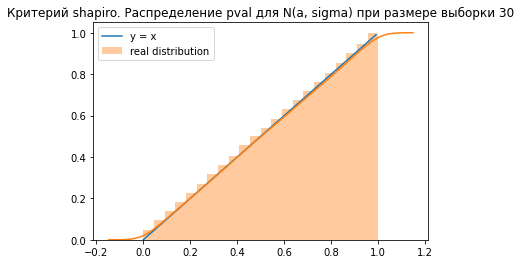

Значений pval < 0.1: 0.1023
Значений pval < 0.05: 0.0511
Значений pval < 0.01: 0.0096


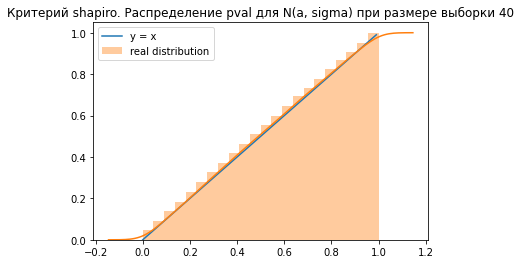

Значений pval < 0.1: 0.1029
Значений pval < 0.05: 0.0499
Значений pval < 0.01: 0.01


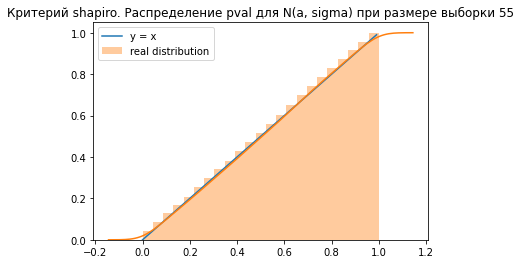

Значений pval < 0.1: 0.0973
Значений pval < 0.05: 0.049
Значений pval < 0.01: 0.0105


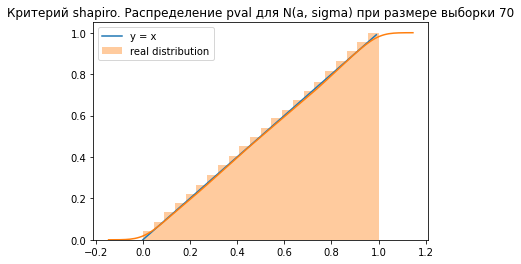

Значений pval < 0.1: 0.0948
Значений pval < 0.05: 0.046
Значений pval < 0.01: 0.0103


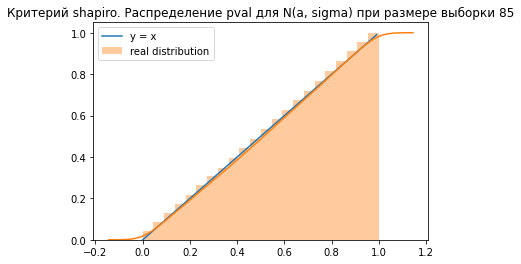

Значений pval < 0.1: 0.0964
Значений pval < 0.05: 0.0488
Значений pval < 0.01: 0.0089


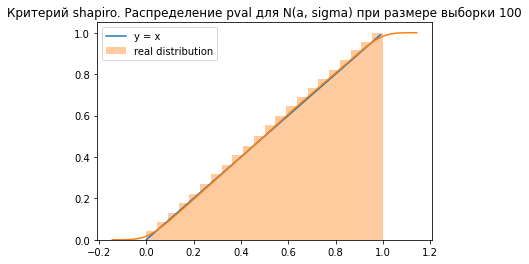

Значений pval < 0.1: 0.0939
Значений pval < 0.05: 0.0447
Значений pval < 0.01: 0.0082


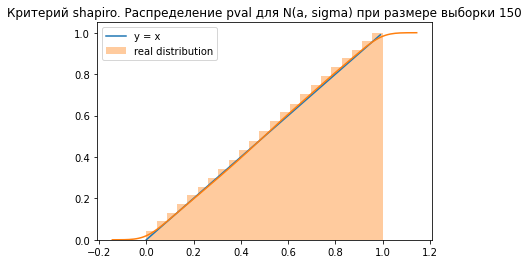

Значений pval < 0.1: 0.1016
Значений pval < 0.05: 0.0494
Значений pval < 0.01: 0.0106


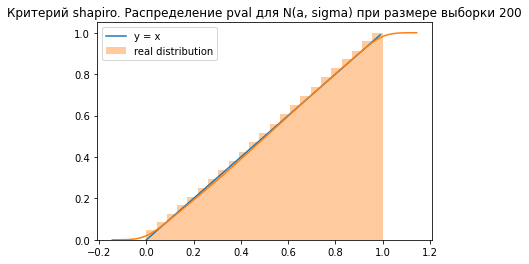

Значений pval < 0.1: 0.0975
Значений pval < 0.05: 0.0522
Значений pval < 0.01: 0.0124


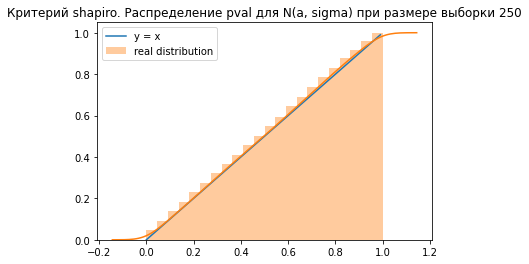

Значений pval < 0.1: 0.1023
Значений pval < 0.05: 0.0505
Значений pval < 0.01: 0.0115


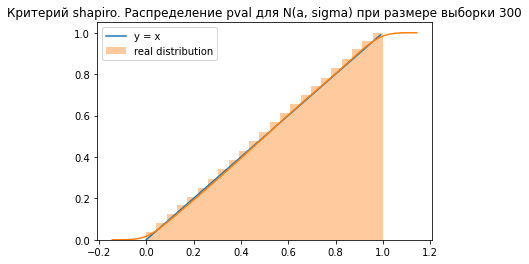

Значений pval < 0.1: 0.0955
Значений pval < 0.05: 0.0453
Значений pval < 0.01: 0.0083


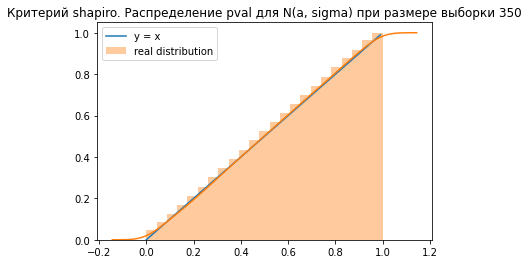

Значений pval < 0.1: 0.0982
Значений pval < 0.05: 0.0516
Значений pval < 0.01: 0.0106


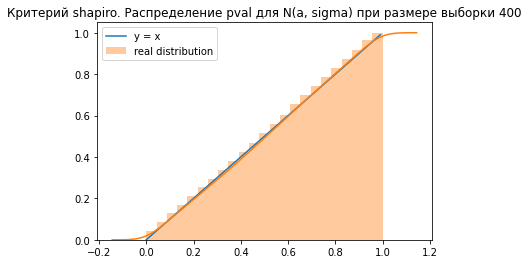

Значений pval < 0.1: 0.0988
Значений pval < 0.05: 0.0493
Значений pval < 0.01: 0.0101


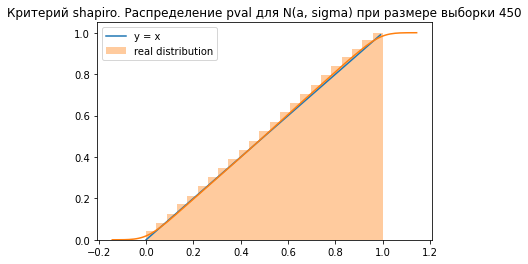

Значений pval < 0.1: 0.0934
Значений pval < 0.05: 0.0483
Значений pval < 0.01: 0.0116


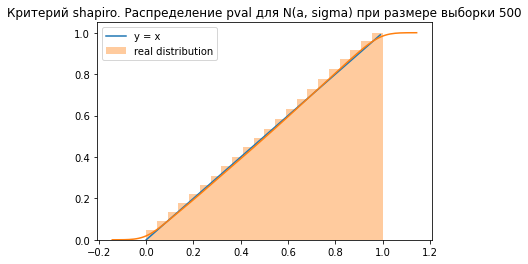

Значений pval < 0.1: 0.0996
Значений pval < 0.05: 0.0494
Значений pval < 0.01: 0.0095


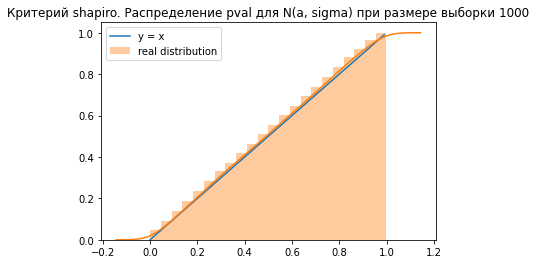

Значений pval < 0.1: 0.1021
Значений pval < 0.05: 0.05
Значений pval < 0.01: 0.0108
Время выполнения: 42.514004707336426


In [4]:
tic = time()
ns = [5, 10, 15, 20, 30, 40, 55, 70, 85, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
for n in ns:
    check_pval('shapiro', n)
print(f'Время выполнения: {time()-tic}')

/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


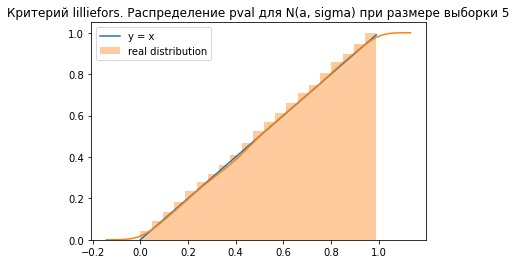

Значений pval < 0.1: 0.0999
Значений pval < 0.05: 0.0443
Значений pval < 0.01: 0.0101


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


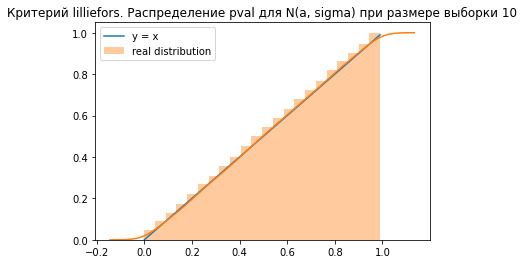

Значений pval < 0.1: 0.1011
Значений pval < 0.05: 0.0514
Значений pval < 0.01: 0.0096


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


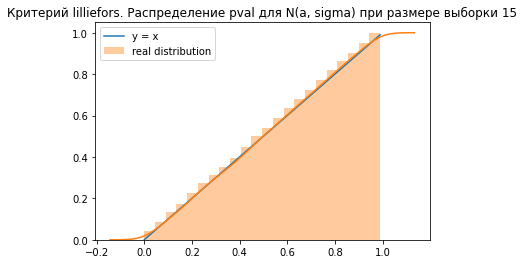

Значений pval < 0.1: 0.1017
Значений pval < 0.05: 0.048
Значений pval < 0.01: 0.0105


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


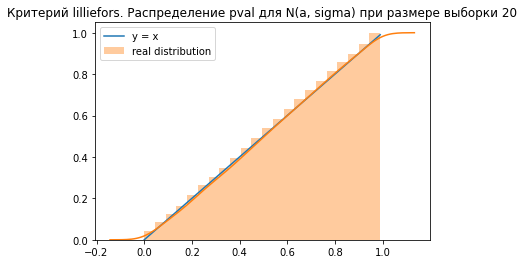

Значений pval < 0.1: 0.1004
Значений pval < 0.05: 0.0481
Значений pval < 0.01: 0.0107


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


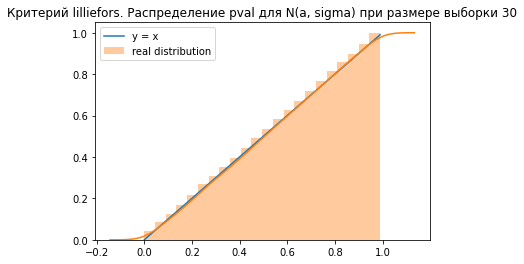

Значений pval < 0.1: 0.0993
Значений pval < 0.05: 0.0473
Значений pval < 0.01: 0.0079


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


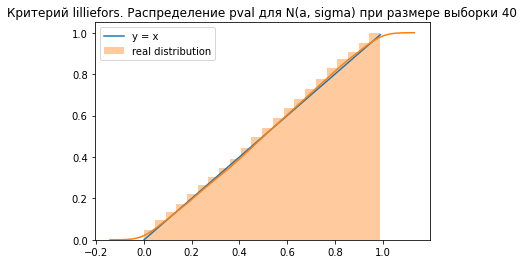

Значений pval < 0.1: 0.1083
Значений pval < 0.05: 0.0531
Значений pval < 0.01: 0.0101


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


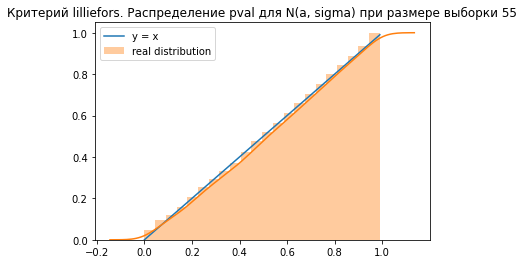

Значений pval < 0.1: 0.1058
Значений pval < 0.05: 0.0533
Значений pval < 0.01: 0.0119


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


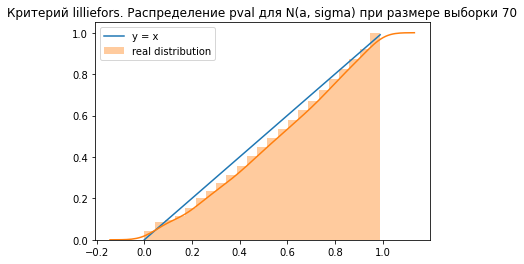

Значений pval < 0.1: 0.0969
Значений pval < 0.05: 0.0493
Значений pval < 0.01: 0.0103


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


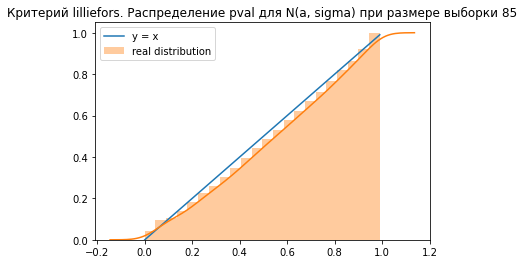

Значений pval < 0.1: 0.1063
Значений pval < 0.05: 0.0503
Значений pval < 0.01: 0.0111


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


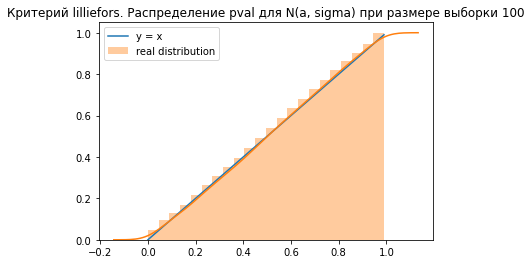

Значений pval < 0.1: 0.1055
Значений pval < 0.05: 0.0517
Значений pval < 0.01: 0.0118


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


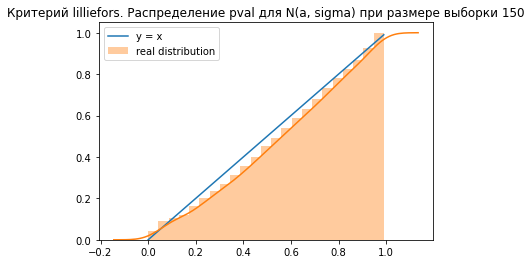

Значений pval < 0.1: 0.1061
Значений pval < 0.05: 0.0506
Значений pval < 0.01: 0.0096


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


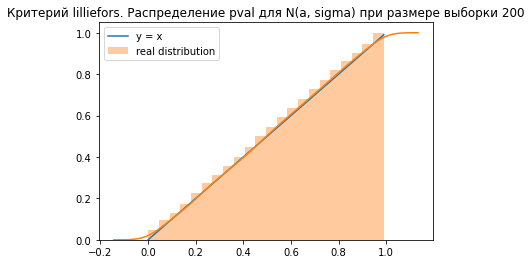

Значений pval < 0.1: 0.1068
Значений pval < 0.05: 0.0546
Значений pval < 0.01: 0.0108


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


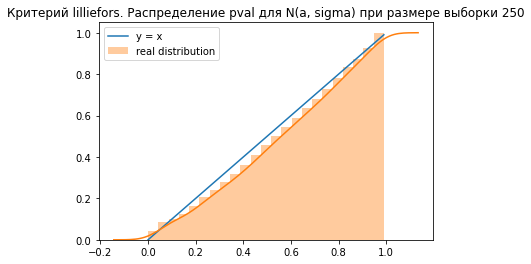

Значений pval < 0.1: 0.0995
Значений pval < 0.05: 0.0488
Значений pval < 0.01: 0.0093


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


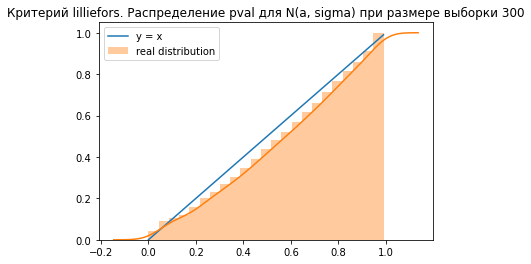

Значений pval < 0.1: 0.1047
Значений pval < 0.05: 0.0518
Значений pval < 0.01: 0.0101


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


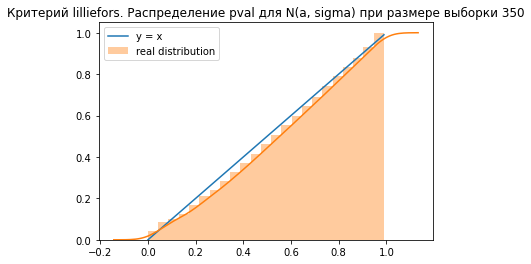

Значений pval < 0.1: 0.1006
Значений pval < 0.05: 0.0496
Значений pval < 0.01: 0.0068


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


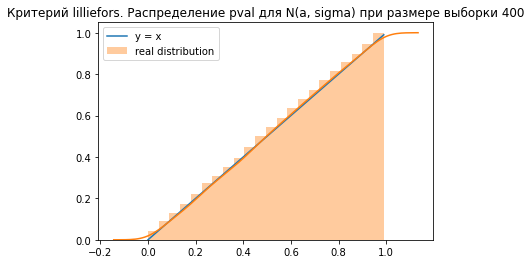

Значений pval < 0.1: 0.1035
Значений pval < 0.05: 0.0484
Значений pval < 0.01: 0.0091


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


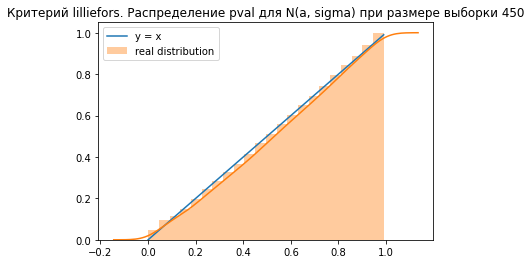

Значений pval < 0.1: 0.1067
Значений pval < 0.05: 0.054
Значений pval < 0.01: 0.01


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


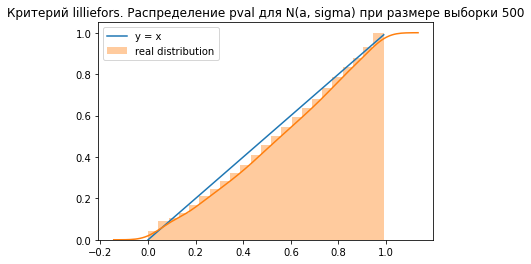

Значений pval < 0.1: 0.1042
Значений pval < 0.05: 0.0506
Значений pval < 0.01: 0.0091


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


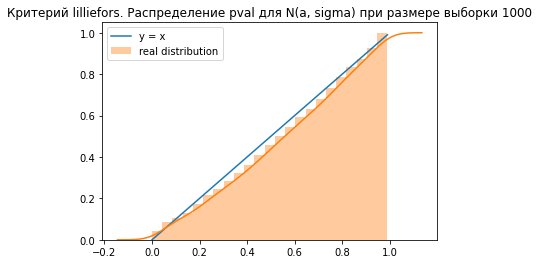

Значений pval < 0.1: 0.1049
Значений pval < 0.05: 0.0506
Значений pval < 0.01: 0.0104
Время выполнения: 284.13880467414856


In [5]:
tic = time()
for n in ns:
    check_pval('lilliefors', n)
print(f'Время выполнения: {time()-tic}')

Выглядит адекватно:
* помним, что изначально pval - случайное число, и распределено должно быть равномерно - так и происходит. ф.р. очень похожа на y=x 
* у нас примерно так и получается, причем значений pval, которые меньше 0.1, 0.05 и 0.01 примерно такая же доля от всех pval (0.1, 0.05 и 0.01) - это значения вероятностей ошибок 1 уровня. Они совпадают с pval)
* то есть применение обоих критериев считаю адекватным.
* lilliefors работает заметно дольше, чем shapiro-wilkins (примерно в 15 раз дольше).

**Посмотрим на мощности**
Сделаем почти то же самое, что выше, но теперь будем предполагать, что верна $H_1$, т.е. у нас равномерное распределение на отрезке $[0;1]$

In [6]:
def check_power(size):
    pvals_shapiro = []
    pvals_lillie = []
    length = 1000
    for _ in range(length):
        sample = make_sample(0, 1, size, H_0 = False)
        pvals_shapiro.append(shapiro(sample)[1])
        pvals_lillie.append(lilliefors(sample)[1])
    tresholds = [0.1, 0.05, 0.01]
    counters_shapiro = [0, 0, 0]
    counters_lillie = [0, 0, 0]
    for p_s, p_l in zip(pvals_shapiro, pvals_lillie):
        for i in range(3):
            if p_s < tresholds[i]:
                counters_shapiro[i]+=1
            if p_l < tresholds[i]:
                counters_lillie[i]+=1
    kwargs = {'cumulative': True}
    plt.title(f'Критерий. Распределение pval для N(a, sigma) при размере выборки {size}')
    pvals_shapiro.append(1)
    pvals_lillie.append(1)
    sns.distplot(pvals_shapiro, label='shapiro criteria pvals', hist_kws=kwargs, kde_kws=kwargs)
    sns.distplot(pvals_lillie, label='lilliefors criteria pvals', hist_kws=kwargs, kde_kws=kwargs)
    plt.legend()
    plt.show()
    print(f'Критерий Шапиро-Уилка, выборка из {size} эл.:')
    for i in range(3):
        print(f'При уровне значимости {tresholds[i]} мощность: {counters_shapiro[i]/length}')
    print(f'Критерий Лиллифорса, выборка из {size} эл.:')
    for i in range(3):
        print(f'При уровне значимости {tresholds[i]} мощность: {counters_lillie[i]/length}')

/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


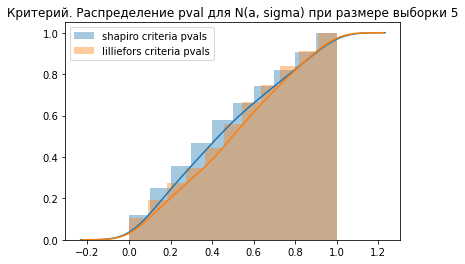

Критерий Шапиро-Уилка, выборка из 5 эл.:
При уровне значимости 0.1 мощность: 0.118
При уровне значимости 0.05 мощность: 0.06
При уровне значимости 0.01 мощность: 0.008
Критерий Лиллифорса, выборка из 5 эл.:
При уровне значимости 0.1 мощность: 0.116
При уровне значимости 0.05 мощность: 0.053
При уровне значимости 0.01 мощность: 0.007


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


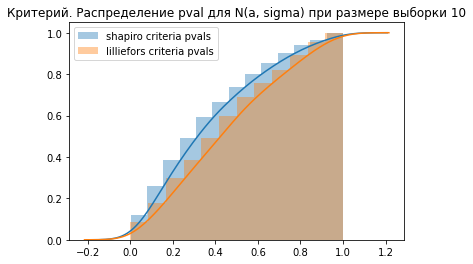

Критерий Шапиро-Уилка, выборка из 10 эл.:
При уровне значимости 0.1 мощность: 0.154
При уровне значимости 0.05 мощность: 0.07
При уровне значимости 0.01 мощность: 0.009
Критерий Лиллифорса, выборка из 10 эл.:
При уровне значимости 0.1 мощность: 0.114
При уровне значимости 0.05 мощность: 0.049
При уровне значимости 0.01 мощность: 0.01


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


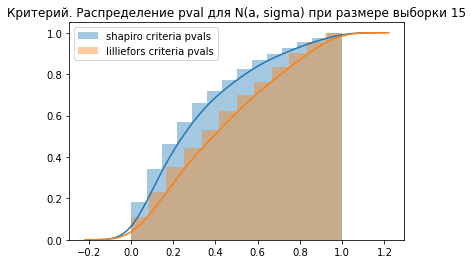

Критерий Шапиро-Уилка, выборка из 15 эл.:
При уровне значимости 0.1 мощность: 0.243
При уровне значимости 0.05 мощность: 0.127
При уровне значимости 0.01 мощность: 0.012
Критерий Лиллифорса, выборка из 15 эл.:
При уровне значимости 0.1 мощность: 0.141
При уровне значимости 0.05 мощность: 0.059
При уровне значимости 0.01 мощность: 0.016


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


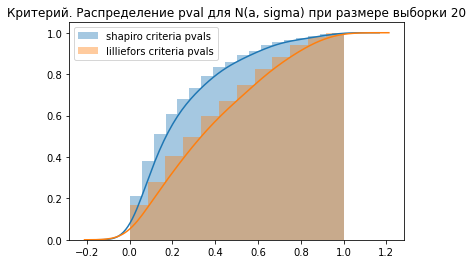

Критерий Шапиро-Уилка, выборка из 20 эл.:
При уровне значимости 0.1 мощность: 0.342
При уровне значимости 0.05 мощность: 0.196
При уровне значимости 0.01 мощность: 0.024
Критерий Лиллифорса, выборка из 20 эл.:
При уровне значимости 0.1 мощность: 0.198
При уровне значимости 0.05 мощность: 0.089
При уровне значимости 0.01 мощность: 0.017


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


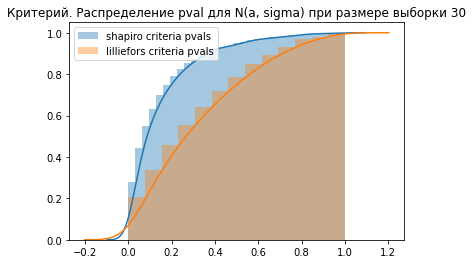

Критерий Шапиро-Уилка, выборка из 30 эл.:
При уровне значимости 0.1 мощность: 0.56
При уровне значимости 0.05 мощность: 0.372
При уровне значимости 0.01 мощность: 0.106
Критерий Лиллифорса, выборка из 30 эл.:
При уровне значимости 0.1 мощность: 0.259
При уровне значимости 0.05 мощность: 0.14
При уровне значимости 0.01 мощность: 0.036


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


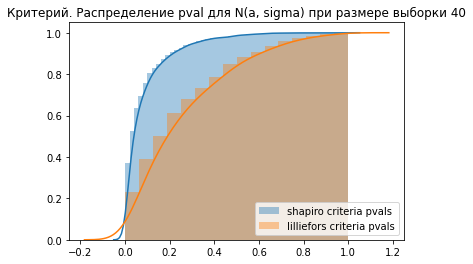

Критерий Шапиро-Уилка, выборка из 40 эл.:
При уровне значимости 0.1 мощность: 0.757
При уровне значимости 0.05 мощность: 0.581
При уровне значимости 0.01 мощность: 0.207
Критерий Лиллифорса, выборка из 40 эл.:
При уровне значимости 0.1 мощность: 0.348
При уровне значимости 0.05 мощность: 0.187
При уровне значимости 0.01 мощность: 0.058


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


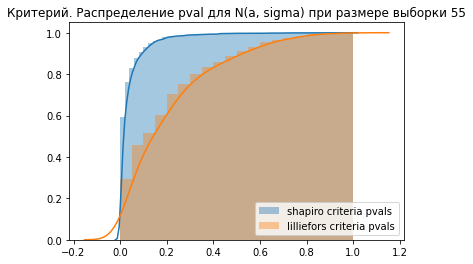

Критерий Шапиро-Уилка, выборка из 55 эл.:
При уровне значимости 0.1 мощность: 0.907
При уровне значимости 0.05 мощность: 0.799
При уровне значимости 0.01 мощность: 0.439
Критерий Лиллифорса, выборка из 55 эл.:
При уровне значимости 0.1 мощность: 0.457
При уровне значимости 0.05 мощность: 0.295
При уровне значимости 0.01 мощность: 0.086


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


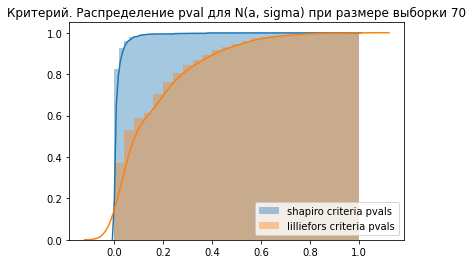

Критерий Шапиро-Уилка, выборка из 70 эл.:
При уровне значимости 0.1 мощность: 0.984
При уровне значимости 0.05 мощность: 0.952
При уровне значимости 0.01 мощность: 0.69
Критерий Лиллифорса, выборка из 70 эл.:
При уровне значимости 0.1 мощность: 0.589
При уровне значимости 0.05 мощность: 0.419
При уровне значимости 0.01 мощность: 0.136


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


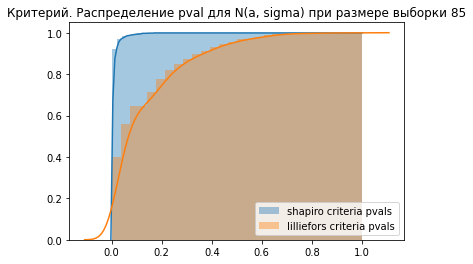

Критерий Шапиро-Уилка, выборка из 85 эл.:
При уровне значимости 0.1 мощность: 0.994
При уровне значимости 0.05 мощность: 0.98
При уровне значимости 0.01 мощность: 0.85
Критерий Лиллифорса, выборка из 85 эл.:
При уровне значимости 0.1 мощность: 0.645
При уровне значимости 0.05 мощность: 0.48
При уровне значимости 0.01 мощность: 0.17


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


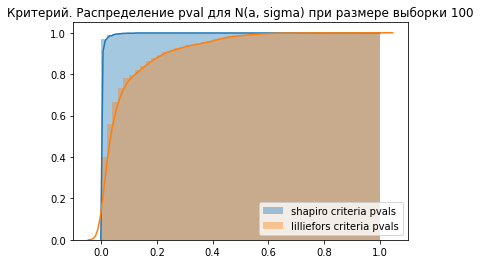

Критерий Шапиро-Уилка, выборка из 100 эл.:
При уровне значимости 0.1 мощность: 0.999
При уровне значимости 0.05 мощность: 0.994
При уровне значимости 0.01 мощность: 0.938
Критерий Лиллифорса, выборка из 100 эл.:
При уровне значимости 0.1 мощность: 0.781
При уровне значимости 0.05 мощность: 0.621
При уровне значимости 0.01 мощность: 0.275


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


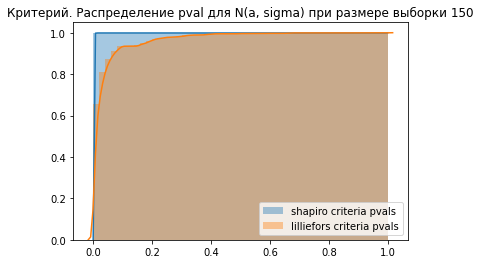

Критерий Шапиро-Уилка, выборка из 150 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 150 эл.:
При уровне значимости 0.1 мощность: 0.936
При уровне значимости 0.05 мощность: 0.845
При уровне значимости 0.01 мощность: 0.516


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


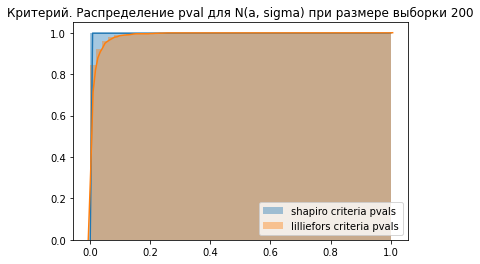

Критерий Шапиро-Уилка, выборка из 200 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 200 эл.:
При уровне значимости 0.1 мощность: 0.988
При уровне значимости 0.05 мощность: 0.953
При уровне значимости 0.01 мощность: 0.735


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


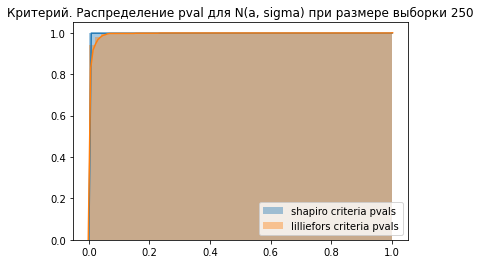

Критерий Шапиро-Уилка, выборка из 250 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 250 эл.:
При уровне значимости 0.1 мощность: 0.998
При уровне значимости 0.05 мощность: 0.991
При уровне значимости 0.01 мощность: 0.885


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


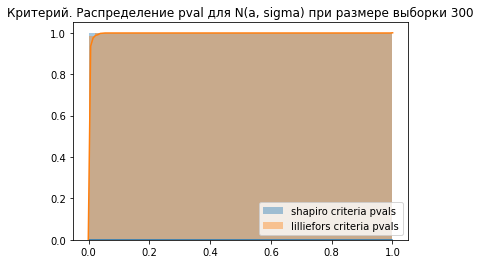

Критерий Шапиро-Уилка, выборка из 300 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 300 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 0.999
При уровне значимости 0.01 мощность: 0.958


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


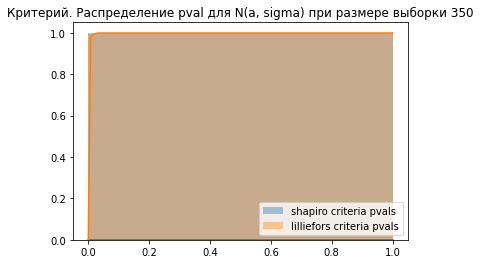

Критерий Шапиро-Уилка, выборка из 350 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 350 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 0.987


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:178: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=endog)[0] for i in range(1, gridsize)]


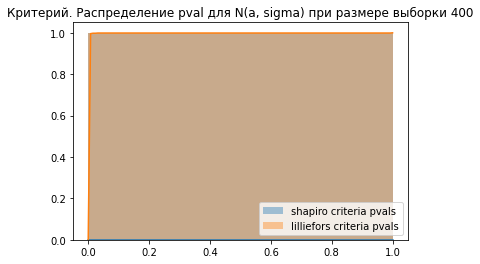

Критерий Шапиро-Уилка, выборка из 400 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 400 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 0.998


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:178: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=endog)[0] for i in range(1, gridsize)]


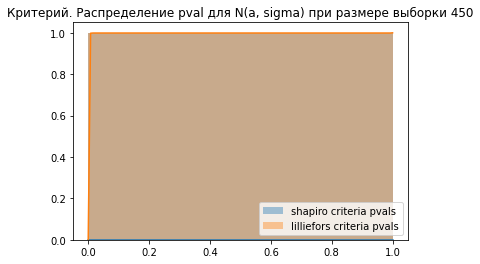

Критерий Шапиро-Уилка, выборка из 450 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 450 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)
/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:178: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=endog)[0] for i in range(1, gridsize)]


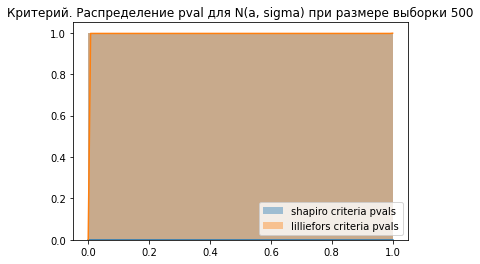

Критерий Шапиро-Уилка, выборка из 500 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 500 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0


/home/toharhymes/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


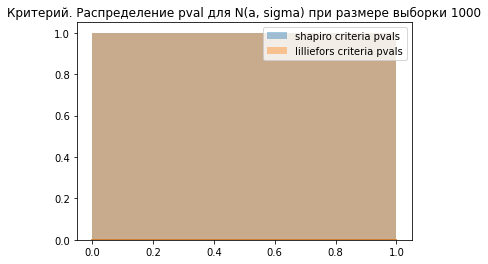

Критерий Шапиро-Уилка, выборка из 1000 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0
Критерий Лиллифорса, выборка из 1000 эл.:
При уровне значимости 0.1 мощность: 1.0
При уровне значимости 0.05 мощность: 1.0
При уровне значимости 0.01 мощность: 1.0


In [7]:
ns = [5, 10, 15, 20, 30, 40, 55, 70, 85, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
for i in ns:
    check_power(i)

**Выводы**

* Ну, собственно да, не особо большая мощность на маленьких выборках, НОООООО Шапиро-Уилк показывает намного лучший Perfomance, чем lilliefors. (видно, что распределение pval быстрее начинает "прогибаться" вверх и быстрее к нулю уходит для альтернативной гипотезы - это здорово, быстрее увеличивается вероятность отвергнуть нулевую в пользу альтернативы).
* Shapiro-Wilk при приближении к size = 100 прям очень хорошие мощности (>90-95) выдает при различных уровнях доверия
* Lilliefors только на 200-300 элементах начинает себя хорошо вести.
* с ~400 эл-в оба критерия дают мощность = 1. 

### Задание 2
Стоит иметь во внимание (чтобы не ужасаться со лабости компьютеров), что данные 1988 года
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
   10. ERP: estimated relative performance from the original article (integer)

In [8]:
data = pd.read_csv('machine.data', names = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])
values = {'vendor_name':'vendor_name',  
            'model_name': 'id(uniques)',
            'MYCT': 'machine cycle time in nanoseconds (integer)',
            'MMIN': 'minimum main memory in kilobytes (integer)',
            'MMAX': 'maximum main memory in kilobytes (integer)',
            'CACH': 'cache memory in kilobytes (integer)',
            'CHMIN': 'minimum channels in units (integer)',
            'CHMAX': 'maximum channels in units (integer)',
            'PRP': 'published relative performance (integer)',
            'ERP': 'estimated relative performance from the original article (integer)'}
data

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


Слишком много всяких непонятных циферок. Начну с простого. К примеру возьму MYCT. 
### Простая гипотеза о среднем по MYCT


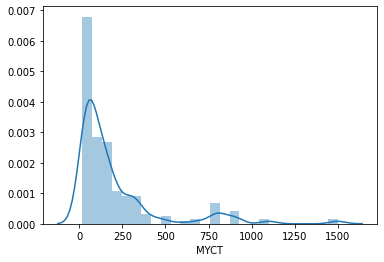

In [9]:
sns.distplot(data.MYCT)

Распределение не нормально.


Зайду на википедию: https://ru.wikipedia.org/wiki/IPS_(%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B4%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%B8%D0%B5)
Посмотрю быстродействие компьтеров на 1989 год (наши данные 1988, самое близкое):

| Процессор / Система | dhrystone MIPS / МГц | Циклов (в секунду) | Год  |
|---------------------|----------------------|--------------------|------|
| Intel i386DX        | 4.3 MIPS at 33 MHz   | 0.13               | 1989 |
| Intel i486DX        | 8.7 MIPS at 25 MHz   | 0.348              | 1989 |
| Intel i860          | 25 MIPS at 25 MHz    | 1                  | 1989 |

Нам нужно MIPS -  million  instructions per second. 

* Среднее = $\frac{4.3+8.7+25}{3} = 12\frac{2}{3}$ миллионов инструкций в секунду, или $\frac{38}{3} \cdot 10^6$ операций в секунду

* Значит на одну операцию$\frac{1}{\frac{38}{3} \cdot 10^6} = \frac{3}{38} \cdot 10^{-6} \approx 78.9 \cdot 10^{-9}$ секунд, т.е. примерно 78 наносекунд. 

Итак, первая нулевая гипотеза $H_0: E(X_i) = 78$, против альтернативы о неравенстве: $H_1: E(X_i) \neq 78$

#### НО

Последний компьютер был мощный, поэтому выдвину еще одну нулевую гипотезу, учитывая только показатели двух: 

* Среднее = $\frac{4.3+8.7}{3} = 4\frac{1}{3}$ миллионов инструкций в секунду, или $\frac{13}{3} \cdot 10^6$ операций в секунду

* Значит на одну операцию$\frac{1}{\frac{13}{3} \cdot 10^6} = \frac{3}{13} \cdot 10^{-6} \approx 230 \cdot 10^{-9}$ секунд, т.е. примерно 230 наносекунд. 

Итак, вторая нулевая гипотеза $H_0: E(X_i) = 230$, против альтернативы о неравенстве: $H_1: E(X_i) \neq 230$

Буду использовать стандартный Z-test (так как ничего другого о выборке сказать не можем).

Зэт-преобразование: $$z = \frac{\overline{X}-\mu}{\frac{\overline{S}}{\sqrt{n}}}$$

Альфу возьму равной $5\%$

In [10]:
def empirical_mean_var_length(X):
    return X.mean(), X.var(), len(X)

def check_n(stat, alpha, both = True, left = False):
    if both:
        left = norm_f.ppf(alpha/2)
        right = norm_f.ppf(1 - alpha/2)
    elif left:
        left = norm_f.ppf(alpha)
        right = norm_f.ppf(1)
    else:
        left = norm_f.ppf(1)
        right = norm_f.ppf(1-alpha)
    print(f'Доверительная область уровня {alpha}: ({left};{right})')
    if left <= stat <= right:
        print(f'Значение статистики = {stat} попадает в нее.')
    else:
        print(f'Значение статистики = {stat} не попадает в нее.')

X = data.MYCT
mean, var, length = empirical_mean_var_length(X)
print('Для H_0: E(X_i = 78)')
z = (mean - 78)/(sqrt(var/length))
check_n(z, 0.05)
print('\nДля H_0: E(X_i = 230)')
z = (mean - 230)/(sqrt(var/length))
check_n(z, 0.05)

Для H_0: E(X_i = 78)
Доверительная область уровня 0.05: (-1.9599639845400545;1.959963984540054)
Значение статистики = 6.989091969175921 не попадает в нее.

Для H_0: E(X_i = 230)
Доверительная область уровня 0.05: (-1.9599639845400545;1.959963984540054)
Значение статистики = -1.4540564385048285 попадает в нее.


Отлично!

1) Есть основания отвергнуть нулевую гипотезу о равенстве среднего времени операции 78 наносекундам в пользу альтернативы.

2) НЕТ оснований отвергать нулевую гипотезу о равенстве среднего времени операции 230 наносекундам!!!

### Published and estimated perfomance

PUBLISHED PERFOMANCE:
	* mean = 105.622009569378
	* variance = 25866.524705557593
ESTIMATED PERFOMANCE:
	* mean = 99.33014354066985
	* variance = 23949.76067353701
ИХ РАЗНИЦА:
	* mean = 6.291866028708134
	* variance = 1705.9095969819662


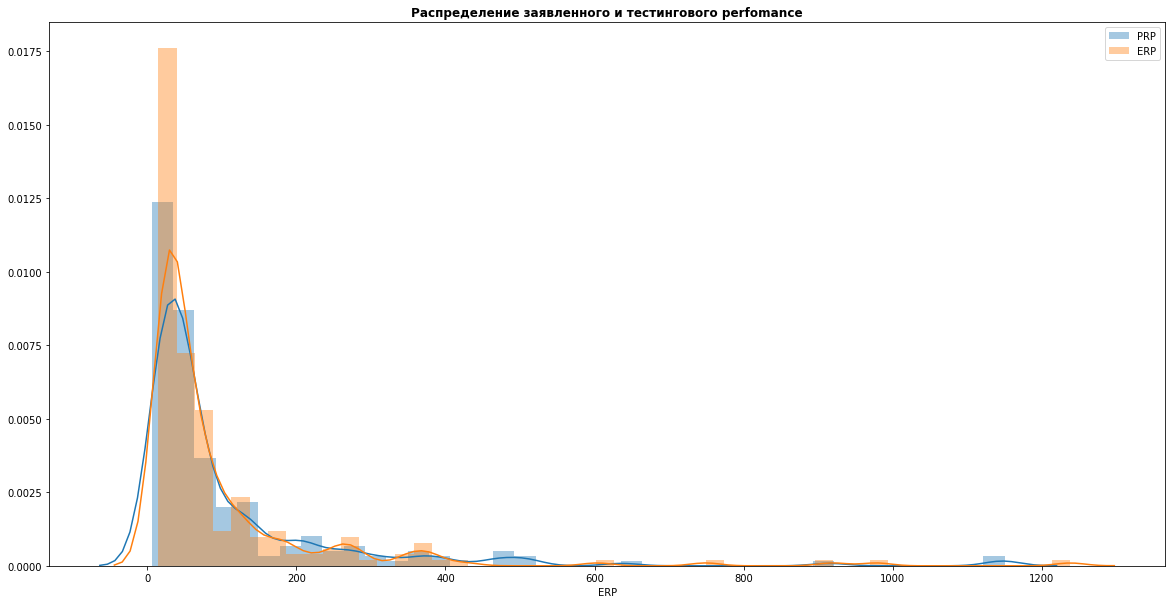

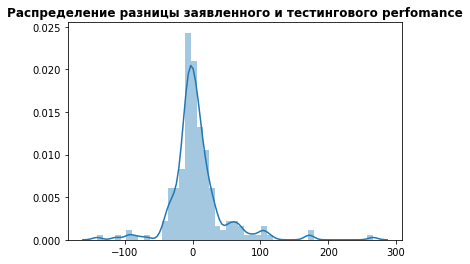

In [11]:
def report_perfomance(ser, name):
    mean = ser.mean()
    var = ser.var()
    print(f'{name}:\n\t* mean = {mean}\n\t* variance = {var}')

report_perfomance(data['PRP'], 'PUBLISHED PERFOMANCE')
report_perfomance(data['ERP'], 'ESTIMATED PERFOMANCE')
report_perfomance(data['PRP'] - data['ERP'], 'ИХ РАЗНИЦА')

plt.figure(figsize=(20, 10))
sns.distplot(data['PRP'], label = 'PRP')
sns.distplot(data['ERP'], label = 'ERP')
plt.title('Распределение заявленного и тестингового perfomance', fontweight="bold")
plt.legend()
plt.show()

sns.distplot(data['PRP'] - data['ERP'])
plt.title('Распределение разницы заявленного и тестингового perfomance', fontweight="bold")
plt.show()

Очевидно, что заявленный и тестинговый перфоманс зависимы. Поэтому напрямую провести тест на равенство средних нельзя, но можно поставить такую гипотезу: $H_0: E(X_i^{(1)} - X_i^{(2)}) = 0$, против альтернативы о неравенстве: $H_1: E(X_i^{(1)} - X_i^{(2)}) \neq 0$.
Воспользуюсь двувыборочным t-критерием для зависимых выборок:
$$t = \frac{M_{d}}{\frac{s_{d}}{ \sqrt{n}}}$$
где$M_{d}$ — средняя разность значений, $s_{d}$ — стандартное отклонение разностей, а $n$ — количество наблюдений.

Эта статистика имеет распределение $t(n-1)$.

Выберем уровень значимости 0.5 и сделаем двусторонний тест.

In [12]:
def empirical_mean_var_length(X):
    return X.mean(), X.var(), len(X)


def check_t(t_stat, df, alpha, both = True, left = False):
    if both:
        left = t_f.ppf(alpha/2, df)
        right = t_f.ppf(1 - alpha/2, df)
    elif left:
        left = t_f.ppf(alpha, df)
        right = t_f.ppf(1, df)
    else:
        left = t_f.ppf(1, df)
        right = t_f.ppf(1-alpha, df)
    print(f'Доверительная область уровня {alpha}: ({left};{right})')
    if left <= t_stat <= right:
        print(f'Значение статистики = {t_stat} попадает в нее.')
    else:
        print(f'Значение статистики = {t_stat} не попадает в нее.')
      
          
M_d, s_d, n = empirical_mean_var_length(data['PRP'] - data['ERP'])
t_stat = M_d/(sqrt(s_d) / sqrt(n))
check_t(t_stat, n-1, 0.05)

Доверительная область уровня 0.05: (-1.9714346585183509;1.9714346585183504)
Значение статистики = 2.202290490735827 не попадает в нее.


Значит есть основания отвергнуть гипотезу о равенстве нулю среднего разницы Estimated и Published perfomance впользу альтернативы.

### Распределения
В задании 1 я проверял на нормальность. Грех не воспользоваться уже проверенным критерием Шапиро-Уилкинса (так как оказалось, что он better. То есть у нас такие гипотезы:

$$H_0: \text{распределение }X^{(i)} \text{ является нормальным}$$
$$H_1: \text{распределение }X^{(i)} \text{ НЕ является нормальным}$$

In [13]:
def check_normal(columnName, columnData, write_all = True):
    if len(columnData)>15:
        try:
            pval = shapiro(columnData)[1]
            if write_all:
                print(f'Для столбца {columnName}, pval = {pval}')
                if pval < 0.05:
                    print('Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.')
                else:
                    print('Нет основания отвергнуть гипотезу о нормальности распределения этого показателя.')
                print()
            elif pval >= 0.05:
                print(f'Для столбца {columnName}, pval = {pval}')
                print(f'Нет основания отвергнуть гипотезу о нормальности распределения этого показателя (размер выборки = {len(columnData)}).')
        except ValueError:
            pass


for (columnName, columnData) in data.iteritems():
    check_normal(columnName, columnData)

Для столбца MYCT, pval = 3.759361723760477e-20
Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.

Для столбца MMIN, pval = 1.7116253071700962e-21
Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.

Для столбца MMAX, pval = 3.0769788680547644e-17
Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.

Для столбца CACH, pval = 1.2508914413123851e-20
Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.

Для столбца CHMIN, pval = 2.5821558080836124e-22
Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.

Для столбца CHMAX, pval = 7.528047364377754e-22
Есть основания отвергнуть гипотезу о нормальности распределения этого показателя в пользу альтернативы.

Для столбца PRP, pval = 9.502437972917194e-23
Есть основания отвергнуть гипотезу о

Oh-oh. Все плохо. Все отвергли (ну это и так было видно, что они не нормальные).

А если отдельно по компаниям, и посмотреть на нормальность там (при этом, чтобы элементов было больше 15ти, иначе все очень не точно)

In [14]:
data.vendor_name.unique()
for name in data.vendor_name.unique():
    print(f'Компания {name}')
    data_n = data[(data['vendor_name']==name)]
    for (columnName, columnData) in data_n.iteritems():
        check_normal(columnName, columnData, write_all = False)
    print()
    print()

Компания adviser


Компания amdahl


Компания apollo


Компания basf


Компания bti


Компания burroughs


Компания c.r.d


Компания cdc


Компания cambex


Компания dec


Компания dg


Компания formation


Компания four-phase


Компания gould


Компания hp


Компания harris


Компания honeywell


Компания ibm


Компания ipl


Компания magnuson


Компания microdata


Компания nas
Для столбца MYCT, pval = 0.09271609038114548
Нет основания отвергнуть гипотезу о нормальности распределения этого показателя (размер выборки = 19).


Компания ncr


Компания nixdorf


Компания perkin-elmer


Компания prime


Компания siemens


Компания sperry


Компания sratus


Компания wang




Таким образом, для распределения значений показателя MYCT компании nas мы не можем отвергнуть нулевую гипотезу о нормальности распределения. (Для остальных можем(((()

### Хи-квадраты
Казалось бы, раз нет нормальных, с помощью хи-квадрата можно попроверять на принадлежность другим распределениям.
Ноооо.. Не все так просто, в каждой из выборок есть значения, которых очень мало (т.е. для них не будет выполняться $n_i \cdot p_i>5$) - доказательства: 

In [15]:
for (columnName, columnData) in data.transpose().iterrows():
    a = pd.DataFrame(columnData.value_counts()).transpose()
    display(a)

,ibm,nas,sperry,ncr,honeywell,siemens,amdahl,cdc,burroughs,hp,...,perkin-elmer,gould,basf,wang,bti,apollo,four-phase,adviser,microdata,sratus
vendor_name,32,19,13,13,13,12,9,9,8,7,...,3,3,2,2,2,2,1,1,1,1


,580-5840,600,universe:68/05,38/4,v8575:ii,7/65,v8565:ii,38/5,m80/31,m80/43,...,dps:7/65,m80/44,1641-11,7.872-2,v8670,vs-90,470v/b,68/10-80,1641-1,3081:d
model_name,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,50,140,26,300,320,56,180,38,75,800,...,175,48,90,600,220,84,124,203,70,185
MYCT,25,9,8,8,7,7,7,7,6,6,...,1,1,1,1,1,1,1,1,1,1


,2000,1000,512,4000,8000,256,768,16000,1310,2620,...,524,192,64,128,500,5000,2300,1500,32000,3000
MMIN,54,38,22,22,20,13,10,7,2,2,...,1,1,1,1,1,1,1,1,1,1


,8000,16000,4000,32000,2000,12000,1000,6000,3000,5000,...,20970,2620,512,10480,3500,64,4500,1500,768,6300
MMAX,43,35,33,23,17,10,7,6,5,5,...,2,2,2,2,1,1,1,1,1,1


,0,8,32,64,16,4,24,128,6,2,...,65,131,256,1,9,48,96,142,160,12
CACH,69,31,23,20,14,8,7,6,5,4,...,2,2,2,2,2,2,1,1,1,1


,1,3,8,6,12,16,4,5,2,0,52,26,24,7,32
CHMIN,94,28,18,16,11,10,8,7,6,5,2,1,1,1,1


,6,24,8,32,5,16,2,4,1,3,...,104,13,15,19,26,28,31,48,52,112
CHMAX,30,24,20,15,13,12,11,11,10,9,...,2,1,1,1,1,1,1,1,1,1


,32,22,50,40,24,36,45,16,26,30,...,61,318,63,64,65,133,67,69,326,259
PRP,7,6,6,6,5,5,5,5,4,4,...,1,1,1,1,1,1,1,1,1,1


,28,20,24,41,34,18,23,29,74,25,...,919,99,101,360,361,107,116,119,120,281
ERP,9,8,7,6,6,6,5,5,5,5,...,1,1,1,1,1,1,1,1,1,1


Итак, что делать с хи квадрат? `Надо создать новый массив и добавлять в него элементы из старого таким образом: если предыдущий <5, то прибавляем к предыдущему, иначе кладем как отдельный. И надо будет отдельно проверить последний элемент После этого надо будет только хи-квадрат применить. Доделай это, пожалуйста.` 

Sounds good and logically. Попробую


In [16]:
def chi2_transform(array, bibl_dist, param):
    array = array.sort_values(ascending=True)
    c = Counter(array)
    final_dist = [[]]
    for el in c:
        # если предыдущий элемент уже содержит 5 чиселок, то добавляем в новую группу
        if len(final_dist[-1])>=5:
            final_dist.append([])
        for _ in range(c[el]):
            final_dist[-1].append(ceil(el))
    # проверка, что последняя группа численностью больше пять
    if len(final_dist[-1])<5:
        for el in final_dist[-1]:
            final_dist[-2].append(el)
        final_dist = final_dist[:len(final_dist)-1]
    observed = []
    expected = []
    pivot = 0
    # ну и дальше создаю массив observed и expected вероятностей, который и возвратим
    for el in final_dist:
        observed.append(len(el)/len(array))
        expected.append(0)
        for i in range(pivot, max(el)+1):
            expected[-1] += bibl_dist.pmf([i], param)[0]
        pivot = max(el)+1
    return observed, expected

def chi2_counter(observed, expected, n):
    n = len(observed)
    chi2_stat = 0
    # умножаю еще на n, так как у меня не сами величины, а вероятности, 
    # то чтобы значения получить,надо все домножить на n (и в числителе и в знаменателе), 
    # но так как сверху квадрат, n в числителе останется/
    for o, e in zip(observed, expected):
        if e != 0:
            chi2_stat += (o-e)**2*n/(e)
    return chi2_stat
        
def check_chi2(my_stat, df, alpha, both = True, left = False):
    if both:
        left = chi2_f.ppf(alpha/2, df)
        right = chi2_f.ppf(1 - alpha/2, df)
    elif left:
        left = chi2_f.ppf(alpha, df)
        right = t_f.ppf(1, df)
    else:
        left = chi2_f.ppf(1, df)
        right = chi2_f.ppf(1-alpha, df)
    print(f'Доверительная область уровня {alpha}: ({left};{right})')
    if left <= my_stat <= right:
        print(f'Значение статистики = {my_stat} попадает в нее.')
    else:
        print(f'Значение статистики = {my_stat} не попадает в нее.')

##### Пара тонкостей:
1. Параметр распределения буду оценивать методом ОМП. Для геометрического распределения, которое я буду использовать, $\theta = \frac{1}{\overline{X}}$ ([доказательство](https://www.matburo.ru/Examples/Files/ms_mmp_5.pdf)).
2. [Тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82) написано, что при использовании ОМП, следует брать степеней свободы k-d-1, где d - размерность нашего параметра. Так как размерность = 1, то в моем случае будет степеней свободы для хи2 = k-2.

P.s. Почему я выбрал геом. распределение? Потому что и правда похожи. Возьму, например CHMIN:

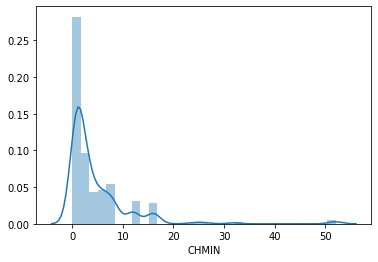

In [17]:
sns.distplot(data.CHMIN)

Поставлю нулевую сложную гипотезу: $H_0: $ распределение с.в. data.CHMIN ~$Geom(\theta)$, против альтернативы $H_1: $ распределено не так.

In [18]:
data_for_chi2 = data.CHMIN
o, e = chi2_transform(data_for_chi2, geom_f, 1/np.mean(data_for_chi2))
print(f'Оценка метотод Max Likelihood: theta = {1/np.mean(data_for_chi2)}')
chi2_stat = chi2_counter(o, e, len(o))
check_chi2(chi2_stat, len(o)-1-1, 0.05)

Оценка метотод Max Likelihood: theta = 0.21283095723014256
Доверительная область уровня 0.05: (2.7003894999803584;19.02276779864163)
Значение статистики = 5.192983739684996 попадает в нее.


Значит, нет основания отвергать нулевую гипотезу о принадлежности геометрическому распределению $Geom(\theta)$ (с оцененным параметром $\theta= 0.21$)